# Final Project Submission

Please fill out:
* Student name: Linda Hutsal
* Student pace: self paced / part time / full time: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [227]:
import pandas as pd #Alias pandas as pd
import matplotlib as plt #Alias matplotlib as plt
import numpy as np #Alias numpy as np
import seaborn as sns #Alias seaborn as sns
from glob import glob
import os

#Magic function to allow plot outputs to appear and be stored in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Next is importing the various data sets using the pandas dataframes:
1. Box Office Mojo, which is in a csv file
2. IMDB, which is in a sqlite database file

For each dataset, we'll look at:
1. a sample of the data
2. the info for the dataset, including data types and count of non-null values
3. the describe table for the dataset, which includes statisticl summary values

In [151]:
#Import and view Box Office Magic data
df_bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
print(df_bom.shape)
df_bom.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Now let's look at the data types and number of non-null values

In [50]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


I'll convert the foreign_gross to a float64, in order to get the dollar amounts where there is a value

In [152]:
df_bom['foreign_gross'] = pd.to_numeric(df_bom["foreign_gross"], errors='coerce')
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [153]:
df_bom.describe()

,domestic_gross,foreign_gross,year
count,3.359000e+03,2.032000e+03,3387.000000
mean,2.874585e+07,7.505704e+07,2013.958075
std,6.698250e+07,1.375294e+08,2.478141
min,1.000000e+02,6.000000e+02,2010.000000
25%,1.200000e+05,3.775000e+06,2012.000000
50%,1.400000e+06,1.890000e+07,2014.000000
75%,2.790000e+07,7.505000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [21]:
#Import and view Rotten Tomatoes Movie Info
df_rt_mi = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
df_rt_mi.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [26]:
#Import and view Rotten Tomatoes Reviews
#df_rt_rev = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t')
#df_rt_rev.head()

#issue loading the file
#opened in Numbers and showed the encoding is Western (Windows Latin 1)

In [27]:
#Import and view Rotten Tomatoes Reviews with Latin-1 encoding
df_rt_rev = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding="latin-1")
df_rt_rev.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [29]:
#Import and view The Movie DB
df_movie_db = pd.read_csv("zippedData/tmdb.movies.csv.gz")
df_movie_db.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [30]:
#Import and view The Numbers
df_the_numbers = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
df_the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [54]:
#View IMDB data via sql
import sqlite3
conn = sqlite3.connect('zippedData/im.db')

pd.read_sql(""" SELECT name FROM sqlite_master WHERE type ='table'
        ;""", conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [57]:
df_movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [59]:
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [60]:
df_movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [62]:
df_movie_ratings = pd.read_sql(""" SELECT * FROM movie_ratings; """, conn)
df_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [63]:
df_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [64]:
df_movie_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


I've now loaded all of the data sources, and while I'd love to use all of the information, in order to keep this focused and efficient with time, I will only use the three dataframes listed below.

Data Cleaning
1. Check for duplicates in the dataframes I'm focusing on:
df_bom
df_movie_basics
df_movie_ratings
2. Look for placeholder values
3. Check for duplicates on title, which will be used to combine the datasets

In [154]:
print(df_bom.duplicated().any())
print(df_movie_basics.duplicated().any())
print(df_movie_ratings.duplicated().any())

False
False
False


In [157]:
df_bom.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [158]:
df_movie_basics.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
title_year         0
dtype: int64

In [159]:
df_movie_ratings.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [104]:
df_bom['title'].duplicated().sum()

1

There's one duplicate value. Let's look at it below and see if it has a material domestic or foreign gross.

In [109]:
df_bom[df_bom.duplicated('title', keep=False) == True]

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,NaN,2017


Now let's look at the primary title field in df_movie_basics:

In [105]:
df_movie_basics['primary_title'].duplicated().sum()

10073

There's a lot more duplicates, which isn't too surprising given how much more data is in the IMDB dataset. Let's first explore the duplicate that we saw in the df_bom: Bluebeard

In [110]:
df_movie_basics[df_movie_basics['primary_title']=='Bluebeard']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
40404,tt2442772,Bluebeard,Barbazul,2012,98.0,Horror
112563,tt6599340,Bluebeard,Haebing,2017,117.0,Thriller


We see that there are also 2 records, with two different years as well. Perhaps we can create a combined field to join the datasets on to create more accuracy than simply the title.

First let's join the IMDB data into one dataframe

In [174]:
df_imdb = pd.read_sql(""" SELECT * FROM movie_basics
                        JOIN movie_ratings USING(movie_id)

; """, conn)
df_imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [175]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [176]:
df_imdb['primary_title'].duplicated().sum()

3863

There are still 3,863 duplicates based on title alone, once the movie_basics and movie_ratings have been combined.

In [177]:
df_imdb['title_year'] = df_imdb['primary_title']+"_"+df_imdb.start_year.astype(str)
df_imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh_2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,One Day Before the Rainy Season_2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,The Other Side of the Wind_2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Sabse Bada Sukh_2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,The Wandering Soap Opera_2017


Now let's check to see how many duplicate values we get for the new combined title and year field:

In [178]:
df_imdb['title_year'].duplicated().sum()

585

Let's look to see if we can take the record that has the most number of votes

In [187]:
df_imdb_dup = df_imdb[df_imdb['title_year'].duplicated(keep=False)].sort_values(by=['title_year', 'numvotes'], ascending=False)
df_imdb_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 56862 to 14576
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1135 non-null   object 
 1   primary_title    1135 non-null   object 
 2   original_title   1135 non-null   object 
 3   start_year       1135 non-null   int64  
 4   runtime_minutes  1032 non-null   float64
 5   genres           1122 non-null   object 
 6   averagerating    1135 non-null   float64
 7   numvotes         1135 non-null   int64  
 8   title_year       1135 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 88.7+ KB


In [188]:
df_imdb_dup.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year
56862,tt5815346,Zoom,Zoom,2016,158.0,"Comedy,Drama,Romance",7.2,85,Zoom_2016
62945,tt6667868,Zoom,Zoom,2016,NaN,Horror,5.4,17,Zoom_2016
49080,tt4842680,Zeus,Zeus,2016,115.0,"Biography,Drama,History",6.5,44,Zeus_2016
58771,tt6066078,Zeus,Zeus,2016,105.0,Drama,7.3,30,Zeus_2016
23668,tt2380333,Worm,Worm,2013,93.0,"Horror,Romance,Sci-Fi",6.2,85,Worm_2013


In [189]:
df_imdb_dup.drop_duplicates(subset='title_year', keep='first',inplace=True)
df_imdb_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 56862 to 12111
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         550 non-null    object 
 1   primary_title    550 non-null    object 
 2   original_title   550 non-null    object 
 3   start_year       550 non-null    int64  
 4   runtime_minutes  519 non-null    float64
 5   genres           549 non-null    object 
 6   averagerating    550 non-null    float64
 7   numvotes         550 non-null    int64  
 8   title_year       550 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 43.0+ KB


We're left with 550 entries, which means some of the duplicates had more than 2 records.

Now let's remove the duplicates from the imdb dataframe and append the cleaned up df_imdb_dup dataframe

In [190]:
df_imdb['title_year'].duplicated(keep=False).sum()

1135

In [191]:
df_imdb.drop_duplicates(subset='title_year', keep=False, inplace=True)
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72721 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         72721 non-null  object 
 1   primary_title    72721 non-null  object 
 2   original_title   72721 non-null  object 
 3   start_year       72721 non-null  int64  
 4   runtime_minutes  65204 non-null  float64
 5   genres           71930 non-null  object 
 6   averagerating    72721 non-null  float64
 7   numvotes         72721 non-null  int64  
 8   title_year       72721 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ MB


Now we have 72,721 records, versus the 73,856 from earlier, which is a difference of 1,135 (exactly the number of duplicates found above). 

Now we'll append the cleaned up 550 entries and will expect a total of 73,271 records

In [194]:
df_imdb_clean = df_imdb.append(df_imdb_dup) 
df_imdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73271 entries, 0 to 12111
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73271 non-null  object 
 1   primary_title    73271 non-null  object 
 2   original_title   73271 non-null  object 
 3   start_year       73271 non-null  int64  
 4   runtime_minutes  65723 non-null  float64
 5   genres           72479 non-null  object 
 6   averagerating    73271 non-null  float64
 7   numvotes         73271 non-null  int64  
 8   title_year       73271 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.6+ MB


Now let's confirm that there's no duplicate values so that we can join on the Box Office Mojo data

In [197]:
df_imdb_clean['title_year'].duplicated(keep=False).sum()

0

Now let's create the combined title and year field for the df_bom data 

In [198]:
df_bom['title_year'] = df_bom['title']+"_"+df_bom.year.astype(str)
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year,title_year
0,Toy Story 3,BV,415000000.0,652000000.0,2010,Toy Story 3_2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,Alice in Wonderland (2010)_2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,Harry Potter and the Deathly Hallows Part 1_2010
3,Inception,WB,292600000.0,535700000.0,2010,Inception_2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,Shrek Forever After_2010


Check on the Bluebeard title to see how it appears in both datasets before we combine them

In [216]:
print(df_imdb_clean[df_imdb_clean['primary_title']=='Bluebeard'])
print(df_bom[df_bom['title']=="Bluebeard"])

#print(df_imdb_clean[df_imdb_clean['primary_title']=='Solace'])
#print(df_bom[df_bom['title']=="Solace"])

        movie_id primary_title original_title  start_year  runtime_minutes  \
24962  tt2442772     Bluebeard       Barbazul        2012             98.0   
62638  tt6599340     Bluebeard        Haebing        2017            117.0   

         genres  averagerating  numvotes      title_year  
24962    Horror            6.1        19  Bluebeard_2012  
62638  Thriller            6.4      1269  Bluebeard_2017  
          title  studio  domestic_gross  foreign_gross  year      title_year
317   Bluebeard  Strand         33500.0         5200.0  2010  Bluebeard_2010
3045  Bluebeard   WGUSA         43100.0            NaN  2017  Bluebeard_2017


Now merge the imdb dataframe with the Box Office Mojo dataframe

In [206]:
df_combined =  pd.merge(left=df_bom, right=df_imdb_clean, on="title_year")
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1822 entries, 0 to 1821
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1822 non-null   object 
 1   studio           1820 non-null   object 
 2   domestic_gross   1812 non-null   float64
 3   foreign_gross    1248 non-null   float64
 4   year             1822 non-null   int64  
 5   title_year       1822 non-null   object 
 6   movie_id         1822 non-null   object 
 7   primary_title    1822 non-null   object 
 8   original_title   1822 non-null   object 
 9   start_year       1822 non-null   int64  
 10  runtime_minutes  1822 non-null   float64
 11  genres           1822 non-null   object 
 12  averagerating    1822 non-null   float64
 13  numvotes         1822 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 213.5+ KB


There are now 1,822 records
Box Office Mojo: 3,387 
IMDB movie_ratings: 73,856
IMDB movie_basics: 146,144
IMDB clean: 73,271

Clearly I've lost a lot of the movies that were in the IMDB database, but the meaningful data is in the box office revenues, so this will be fine to go ahead with the analysis

In [207]:
df_combined.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,Toy Story 3_2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,Inception_2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,Shrek Forever After_2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,The Twilight Saga: Eclipse_2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,Iron Man 2_2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [208]:
#check for null values
df_combined.isnull().sum()

title                0
studio               2
domestic_gross      10
foreign_gross      574
year                 0
title_year           0
movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
dtype: int64

Let's look to see if the rows that have no foreign gross revenue have a domestic gross revenue:

In [209]:
df_combined[df_combined['foreign_gross'].isna()].sort_values('domestic_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1652,Avengers: Infinity War,BV,678800000.0,NaN,2018,Avengers: Infinity War_2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
998,Jurassic World,Uni.,652300000.0,NaN,2015,Jurassic World_2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
999,Furious 7,Uni.,353000000.0,NaN,2015,Furious 7_2015,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",7.2,335074
1465,The Fate of the Furious,Uni.,226000000.0,NaN,2017,The Fate of the Furious_2017,tt4630562,The Fate of the Furious,The Fate of the Furious,2017,136.0,"Action,Crime,Thriller",6.7,179774
1717,Book Club,Par.,68600000.0,NaN,2018,Book Club_2018,tt6857166,Book Club,Book Club,2018,104.0,"Comedy,Drama,Romance",6.1,18728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,Open Windows,Cdgm.,1800.0,NaN,2014,Open Windows_2014,tt2409818,Open Windows,Open Windows,2014,100.0,"Crime,Horror,Thriller",5.2,12764
1821,An Actor Prepares,Grav.,1700.0,NaN,2018,An Actor Prepares_2018,tt5718046,An Actor Prepares,An Actor Prepares,2018,97.0,Comedy,5.0,388
796,I Spit on Your Grave 2,Anch.,800.0,NaN,2013,I Spit on Your Grave 2_2013,tt2537176,I Spit on Your Grave 2,I Spit on Your Grave 2,2013,106.0,"Horror,Thriller",5.7,24100
1651,2:22,Magn.,400.0,NaN,2017,2:22_2017,tt1131724,2:22,2:22,2017,98.0,Thriller,5.8,16318


In [211]:
df_combined[df_combined['domestic_gross'].isna()].sort_values('foreign_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1517,Secret Superstar,NaN,NaN,122000000.0,2017,Secret Superstar_2017,tt6108090,Secret Superstar,Secret Superstar,2017,150.0,"Drama,Music",8.0,16563
913,Jessabelle,LGF,NaN,7000000.0,2014,Jessabelle_2014,tt2300975,Jessabelle,Jessabelle,2014,90.0,"Horror,Thriller",5.4,20552
526,The Tall Man,Imag.,NaN,5200000.0,2012,The Tall Man_2012,tt1658837,The Tall Man,The Tall Man,2012,106.0,"Crime,Drama,Horror",5.9,36331
327,Force,FoxS,NaN,4800000.0,2011,Force_2011,tt1992138,Force,Force,2011,137.0,"Action,Thriller",6.4,6348
529,Keith Lemon: The Film,NaN,NaN,4000000.0,2012,Keith Lemon: The Film_2012,tt2147365,Keith Lemon: The Film,Keith Lemon: The Film,2012,85.0,Comedy,2.6,3950
152,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010,It's a Wonderful Afterlife_2010,tt1319716,It's a Wonderful Afterlife,It's a Wonderful Afterlife,2010,100.0,"Comedy,Drama,Fantasy",5.4,1361
1414,Viral,W/Dim.,NaN,552000.0,2016,Viral_2016,tt2597892,Viral,Viral,2016,85.0,"Drama,Horror,Sci-Fi",5.5,7150
565,Dark Tide,WHE,NaN,432000.0,2012,Dark Tide_2012,tt1507563,Dark Tide,Dark Tide,2012,94.0,"Action,Adventure,Drama",4.3,7682
176,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010,Celine: Through the Eyes of the World_2010,tt1570982,Celine: Through the Eyes of the World,Celine: Through the Eyes of the World,2010,120.0,"Documentary,Music",7.9,349
179,White Lion,Scre.,NaN,99600.0,2010,White Lion_2010,tt1618421,White Lion,White Lion,2010,88.0,"Drama,Family",6.7,828


It looks like the Secret Superstar movie was a big hit in India, which explains why there's no domestic gross revenue, but a foreign gross of $122MM.

In [212]:
df_combined['title'].duplicated().sum()

0

In [217]:
df_combined.isnull().sum()

title                0
studio               2
domestic_gross      10
foreign_gross      574
year                 0
title_year           0
movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
dtype: int64

In [218]:
df_combined[df_combined['studio'].isnull()]

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
529,Keith Lemon: The Film,NaN,NaN,4000000.0,2012,Keith Lemon: The Film_2012,tt2147365,Keith Lemon: The Film,Keith Lemon: The Film,2012,85.0,Comedy,2.6,3950
1517,Secret Superstar,NaN,NaN,122000000.0,2017,Secret Superstar_2017,tt6108090,Secret Superstar,Secret Superstar,2017,150.0,"Drama,Music",8.0,16563


In [223]:
df_combined['domestic_gross'] = df_combined['domestic_gross'].fillna(0)
df_combined['foreign_gross'] = df_combined['foreign_gross'].fillna(0)

Let's now create a new field that shows the combined revenue (domestic + foreign)

In [224]:
df_combined['combined_gross'] = df_combined['domestic_gross']+df_combined['foreign_gross']
df_combined.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,combined_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,Toy Story 3_2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,1.067000e+09
1,Inception,WB,292600000.0,535700000.0,2010,Inception_2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,8.283000e+08
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,Shrek Forever After_2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,7.526000e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,The Twilight Saga: Eclipse_2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,6.985000e+08
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,Iron Man 2_2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,6.239000e+08


In [225]:
df_combined.isnull().sum()

title              0
studio             2
domestic_gross     0
foreign_gross      0
year               0
title_year         0
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
combined_gross     0
dtype: int64

Now there's just two records that have a null value for studio, which seems like a reasonable dataset to proceed with. Let's plot the info and see what it looks like

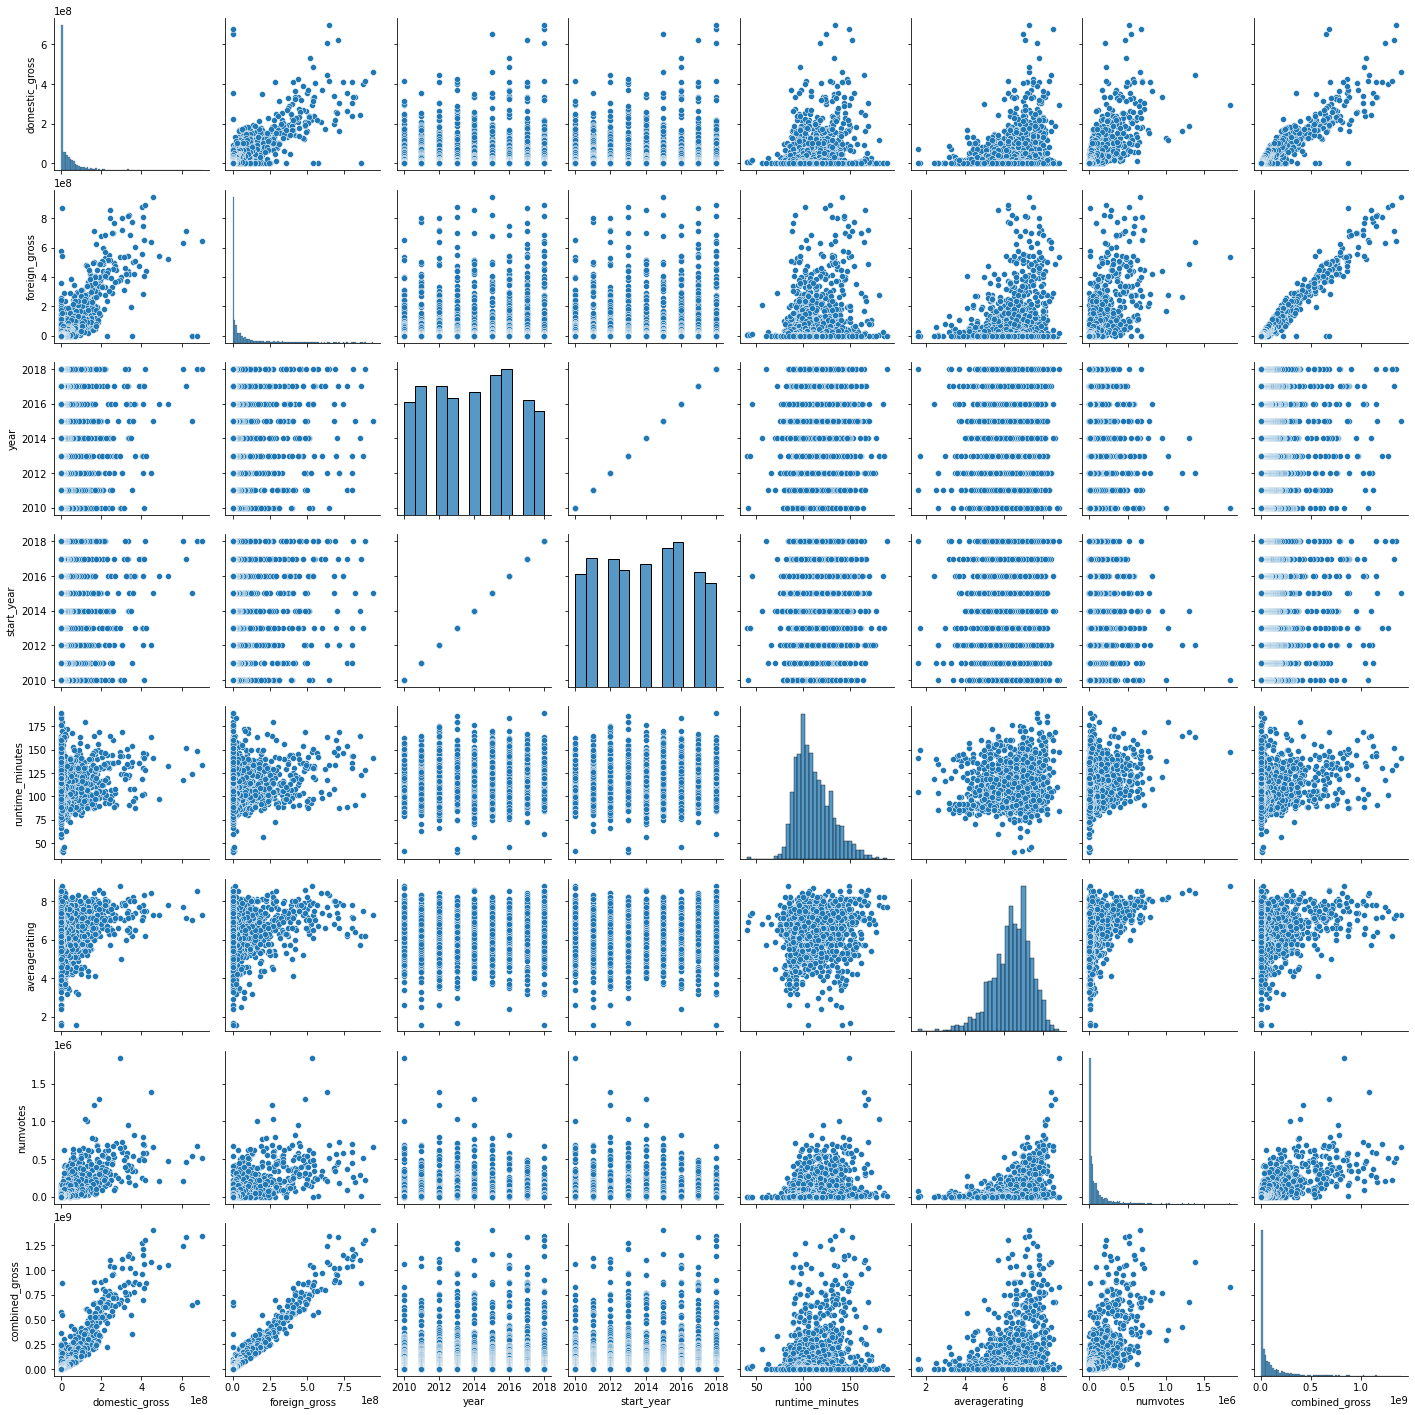

In [228]:
sns.pairplot(df_combined)